### 이진분류 : 영화리뷰

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=1000)

In [3]:
x_train.shape

(25000,)

In [4]:
# 리뷰를 텍스트로 디코딩

In [5]:
import tensorflow as tf

In [6]:
word_index = imdb.get_word_index()

In [7]:
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])

In [8]:
decoded_review = " ".join(
    reverse_word_index.get(i-3,"?") for i in x_train[0]
)

In [9]:
# 데이터 준비
# 숫자를 멀티 - 핫 인코딩
import numpy as np
def vectorize_sequences(sequences, dimension = 1000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [10]:
temp =[
    [1,2],
    [3,4]
]
np.array(temp).shape

(2, 2)

In [11]:
vectorize_sequences(temp,5)

array([[0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.]])

In [12]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

### 신경망 모델 생성

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['acc'])
# 둘 중 하나이기 때문에 손실함수는 binary를 주었음

In [16]:
x_train.shape, y_train.shape

((25000, 1000), (25000,))

In [17]:
# 훈련데이터를 학습용과 검증용 데이터로 split
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train,random_state=32)
x_tr.shape, x_val.shape

((18750, 1000), (6250, 1000))

In [18]:
# 모델 훈련
hist = model.fit(x_tr,y_tr, epochs=20, batch_size=512, validation_data=(x_val,y_val),verbose=1)

Epoch 1/20
37/37 [==============================] - 1s 6ms/step - loss: 0.6315 - acc: 0.6570 - val_loss: 0.5096 - val_acc: 0.7845
Epoch 2/20
37/37 [==============================] - 0s 3ms/step - loss: 0.4264 - acc: 0.8268 - val_loss: 0.3657 - val_acc: 0.8472
Epoch 3/20
37/37 [==============================] - 0s 3ms/step - loss: 0.3395 - acc: 0.8618 - val_loss: 0.3328 - val_acc: 0.8600
Epoch 4/20
37/37 [==============================] - 0s 3ms/step - loss: 0.3152 - acc: 0.8716 - val_loss: 0.3327 - val_acc: 0.8573
Epoch 5/20
37/37 [==============================] - 0s 3ms/step - loss: 0.3044 - acc: 0.8757 - val_loss: 0.3307 - val_acc: 0.8606
Epoch 6/20
37/37 [==============================] - 0s 3ms/step - loss: 0.2970 - acc: 0.8776 - val_loss: 0.3464 - val_acc: 0.8507
Epoch 7/20
37/37 [==============================] - 0s 3ms/step - loss: 0.2947 - acc: 0.8791 - val_loss: 0.3305 - val_acc: 0.8626
Epoch 8/20
37/37 [==============================] - 0s 4ms/step - loss: 0.2918 - acc: 0.87

In [19]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

<function matplotlib.pyplot.show(close=None, block=None)>

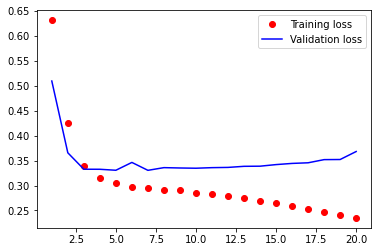

In [20]:
import matplotlib.pyplot as plt
history_dict = hist.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"ro",label="Training loss")
plt.plot(epochs, val_loss_values,"b",label="Validation loss")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

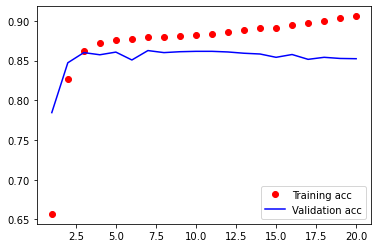

In [21]:
history_dict = hist.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"ro",label="Training acc")
plt.plot(epochs, val_loss_values,"b",label="Validation acc")
plt.legend()
plt.show

In [22]:
# 예측
model.predict(x_test)

array([[0.13056794],
       [0.99980533],
       [0.654661  ],
       ...,
       [0.08486184],
       [0.01932102],
       [0.4915745 ]], dtype=float32)

In [23]:
# 평가
model.evaluate(x_test,y_test)

782/782 [==============================] - ETA: 0s - loss: 0.3634 - acc: 0.850 - 0s 576us/step - loss: 0.3628 - acc: 0.8505


[0.36280587315559387, 0.8504800200462341]

In [24]:
# 다중분류
from tensorflow.keras.datasets import reuters
(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words=10000)
x_train.shape, x_test.shape

((8982,), (2246,))

In [25]:
x_train = vectorize_sequences(x_train, 10000)
x_test = vectorize_sequences(x_test,10000)

In [26]:
# 레이블 인코딩을 했을 경우 손실함수를 categorical_crossentropy로 줘야함
# 레이블 인코딩을 하지 않았을 경우 손실함수를 sparse_categorical_crossentropy로 줘야함
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)

In [27]:
model = tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(46,activation='softmax')
])

In [28]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['acc'])

In [29]:
# 훈련데이터를 학습용과 검증용 데이터로 split
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train)
x_tr.shape, x_val.shape

((6736, 10000), (2246, 10000))

In [30]:
hist = model.fit(x_tr,y_tr, epochs=30, batch_size = 128, validation_data=(x_val,y_val),verbose=1)

Epoch 1/30
53/53 [==============================] - 1s 13ms/step - loss: 3.0639 - acc: 0.2672 - val_loss: 1.8719 - val_acc: 0.5784
Epoch 2/30
53/53 [==============================] - 1s 11ms/step - loss: 1.9273 - acc: 0.5251 - val_loss: 1.5521 - val_acc: 0.6305
Epoch 3/30
53/53 [==============================] - 1s 11ms/step - loss: 1.6332 - acc: 0.6004 - val_loss: 1.4256 - val_acc: 0.6825
Epoch 4/30
53/53 [==============================] - 1s 11ms/step - loss: 1.4134 - acc: 0.6611 - val_loss: 1.3362 - val_acc: 0.6928
Epoch 5/30
53/53 [==============================] - 1s 10ms/step - loss: 1.2651 - acc: 0.6827 - val_loss: 1.3305 - val_acc: 0.6937
Epoch 6/30
53/53 [==============================] - 1s 11ms/step - loss: 1.1613 - acc: 0.7028 - val_loss: 1.3066 - val_acc: 0.7008
Epoch 7/30
53/53 [==============================] - 1s 10ms/step - loss: 1.0800 - acc: 0.7184 - val_loss: 1.3016 - val_acc: 0.7204
Epoch 8/30
53/53 [==============================] - 1s 11ms/step - loss: 1.0021 - a

<function matplotlib.pyplot.show(close=None, block=None)>

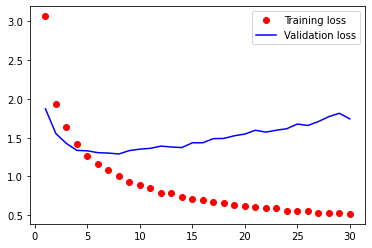

In [31]:
history_dict = hist.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"ro",label="Training loss")
plt.plot(epochs, val_loss_values,"b",label="Validation loss")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

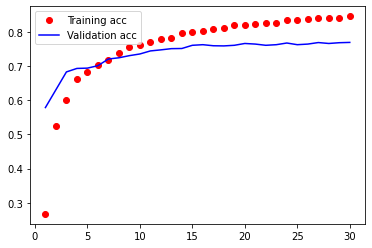

In [32]:
history_dict = hist.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,"ro",label="Training acc")
plt.plot(epochs, val_loss_values,"b",label="Validation acc")
plt.legend()
plt.show

In [33]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.8043 - acc: 0.7676


[1.8042960166931152, 0.7675868272781372]

### 보스턴 주택 가격

In [34]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets),(test_data,test_targets) = boston_housing.load_data()

In [35]:
train_data.shape

(404, 13)

In [36]:
# 데이터 정규화
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)

train_data /= std

test_data -= mean
test_data /= std

In [37]:
# 모델 정의
# 분류가 아닌 예측모델이므로 마지막 층에는 활성화함수를 따로 주지 않음
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [52]:
# k-fold 검증
k = 4
num_val_samples =  len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [
            train_data[:i*num_val_samples],
            train_data[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [
            train_targets[:i*num_val_samples],
            train_targets[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    model = build_model()
    model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=16)
    val_mse, val_mae =  model.evaluate(val_data,val_targets)
    all_scores.append(val_mae)

In [39]:
all_scores

[2.024608612060547, 2.3919522762298584, 2.3310441970825195, 2.4382214546203613]

In [40]:
np.mean(all_scores)

2.2964566349983215

In [51]:
# k-겹 검증 
k = 4
num_val_samples =  len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [
            train_data[:i*num_val_samples],
            train_data[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [
            train_targets[:i*num_val_samples],
            train_targets[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    model = build_model()
    history = model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=16,
                        validation_data=(val_data,val_targets) )
    val_mse, val_mae =  model.evaluate(val_data,val_targets)
    all_mae_histories.append(history.history['val_mae'])

In [42]:
np.array(all_mae_histories).shape

(4, 500)

In [43]:
num_epochs

500

In [44]:
# k겹 검증 점수 평균을 기록
average_mae_history = [np.mean( [x[i] for x in all_mae_histories] )  for i in range(num_epochs)]
len(average_mae_history)

500

In [45]:
np.array([[x[i] for x in all_mae_histories]   for i in range(num_epochs)]).shape

(500, 4)

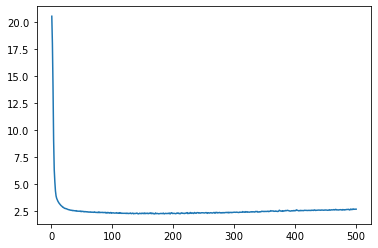

In [46]:
# 검증점수  epoch당 
import matplotlib.pyplot as plt
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.show()

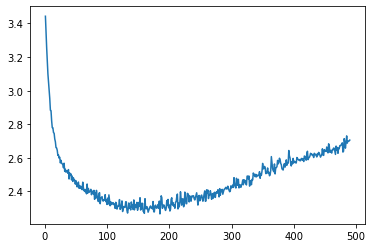

In [47]:
# 처음 10개의 포인터를 제외하고 그려보면
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1,len(truncated_mae_history)+1), truncated_mae_history)
plt.show()

In [48]:
# 다시 훈련
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 13.3100 - mae: 2.3862


In [49]:
test_mae_score

2.386168956756592

In [50]:
predictions = model.predict(test_data)
predictions[0]

array([7.0517864], dtype=float32)